# Linear Regression - part 1

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets

import seaborn as sns; sns.set()
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

from IPython.display import Math, HTML, display, Markdown, Latex
%matplotlib inline

# Load the diabetes dataset

In [2]:
feature_matrix, target, feature_names, descr, _ = datasets.load_boston().values()
display(Markdown('## Info'))
print(descr)

display(Markdown('## Feature Matrix'))
feature_matrix = pd.DataFrame(feature_matrix, columns=feature_names)
display(feature_matrix.head())

display(Markdown('## target'))
target = pd.DataFrame(target, columns=['y'])
display(target.head())

## Info

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Feature Matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## target

,y
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


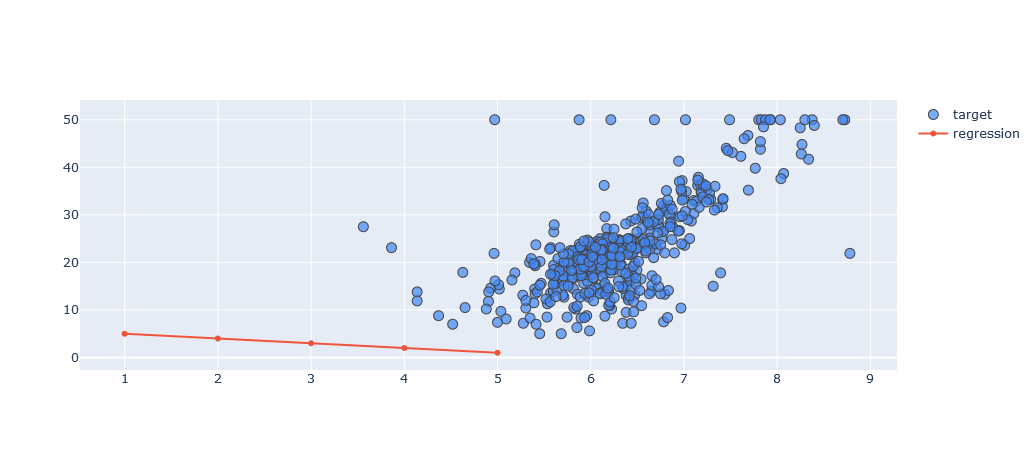

In [66]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=feature_matrix.RM.values,
        y=target.y.values,
        mode='markers',
        name='target',
        marker = dict(size = 10,
                      color = 'rgba(66, 135, 245, .7)',
                      line = dict(width = 1)
        )
    )
)

fig.add_trace(
    go.Scatter( x=[1, 2, 3, 4, 5],
                y=[5, 4, 3, 2, 1],
                name='regression',
              )
)



fig.update_layout(showlegend=True)

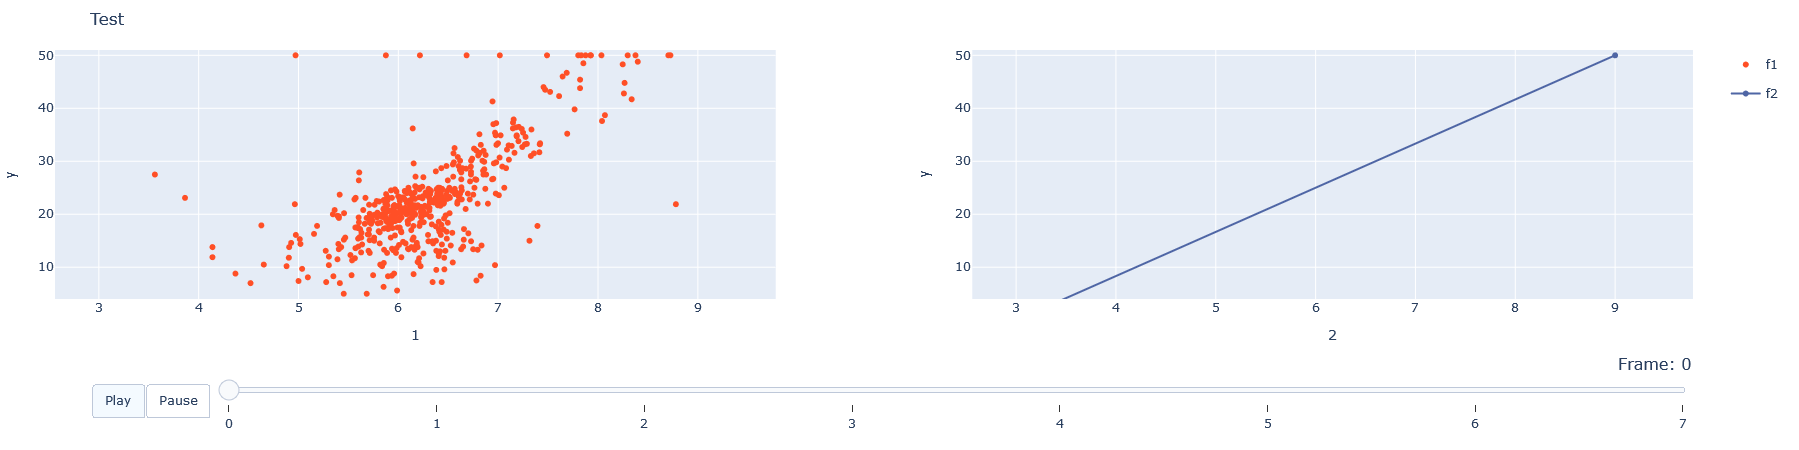

In [106]:
def create_dynamic_plot(static_data, dynamic_data):
    fig = dict(
        layout = dict(
            xaxis1 = {'domain': [0.0, 0.44], 'anchor': 'y1', 'title': '1', 'range': [min(static_data['x'])-1, max(static_data['x'])+1]},
            yaxis1 = {'domain': [0.0, 1.0], 'anchor': 'x1', 'title': 'y', 'range': [min(static_data['y'])-1, max(static_data['y'])+1]},
            xaxis2 = {'domain': [0.56, 1.0], 'anchor': 'y2', 'title': '2', 'range': [min(static_data['x'])-1, max(static_data['x'])+1]},
            yaxis2 = {'domain': [0.0, 1.0], 'anchor': 'x2', 'title': 'y', 'range': [min(static_data['y'])-1, max(static_data['y'])+1]},
            
            title  = 'Test',
            margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
            
            updatemenus = [{'buttons': [{'args': [list(range(len(dynamic_data))), {'frame': {'duration': 500.0, 'redraw': False}, 'fromcurrent': True, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': 'Play', 'method': 'animate'}, {'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}], 'label': 'Pause', 'method': 'animate'}], 'direction': 'left', 'pad': {'r': 10, 't': 85}, 'showactive': True, 'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
            sliders = [{'yanchor': 'top', 'xanchor': 'left', 'currentvalue': {'font': {'size': 16}, 'prefix': 'Frame: ', 'visible': True, 'xanchor': 'right'}, 'transition': {'duration': 500.0, 'easing': 'linear'}, 'pad': {'b': 10, 't': 50}, 'len': 0.9, 'x': 0.1, 'y': 0, 
                        'steps': [{'args': [[str(i)], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': False}, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': str(i), 'method': 'animate'} for i in list(range(len(dynamic_data)))]}]
        ),
        data = [{'type': 'scatter', 'name': 'f1', 'x': None, 'y': None, 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'},
                {'type': 'scatter', 'name': 'f2', 'x': None, 'y': None, 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'},
                ]
    )
    
    # Add static data
    fig['data'][0]['x'] = static_data['x']
    fig['data'][0]['y'] = static_data['y']
    
    # add dynamic data
    fig['data'][1]['x'] = dynamic_data[0]['x']
    fig['data'][1]['y'] = dynamic_data[0]['y']
    
    # dynamic
    fig['frames'] = []
    for e, values in enumerate(dynamic_data):
        dx = values['x']
        dy = values['y']
        
        frame = {'name' : str(e), 'layout' : {},
                 'data': [
                     {'type': 'scatter', 'name': 'f1', 'x': static_data['x'], 'y': static_data['y'], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'}, 
                     {'type': 'scatter', 'name': 'f2', 'x': dx, 'y': dy, 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'}],
                }
        
        fig['frames'].append(frame)

    
    return go.Figure(fig)


    
static_data = {'x':feature_matrix.RM.values, 'y':target.y.values}
dynamic_data = [{'x':[3,9], 'y':[0,50]},
                {'x':[3,9], 'y':[5,45]},
                {'x':[3,9], 'y':[10,40]},
                {'x':[3,9], 'y':[20,30]},
                {'x':[3,9], 'y':[30,20]},
                {'x':[3,9], 'y':[40,10]},
                {'x':[3,9], 'y':[45,5]},
                {'x':[3,9], 'y':[50,0]}]

create_dynamic_plot(static_data, dynamic_data)

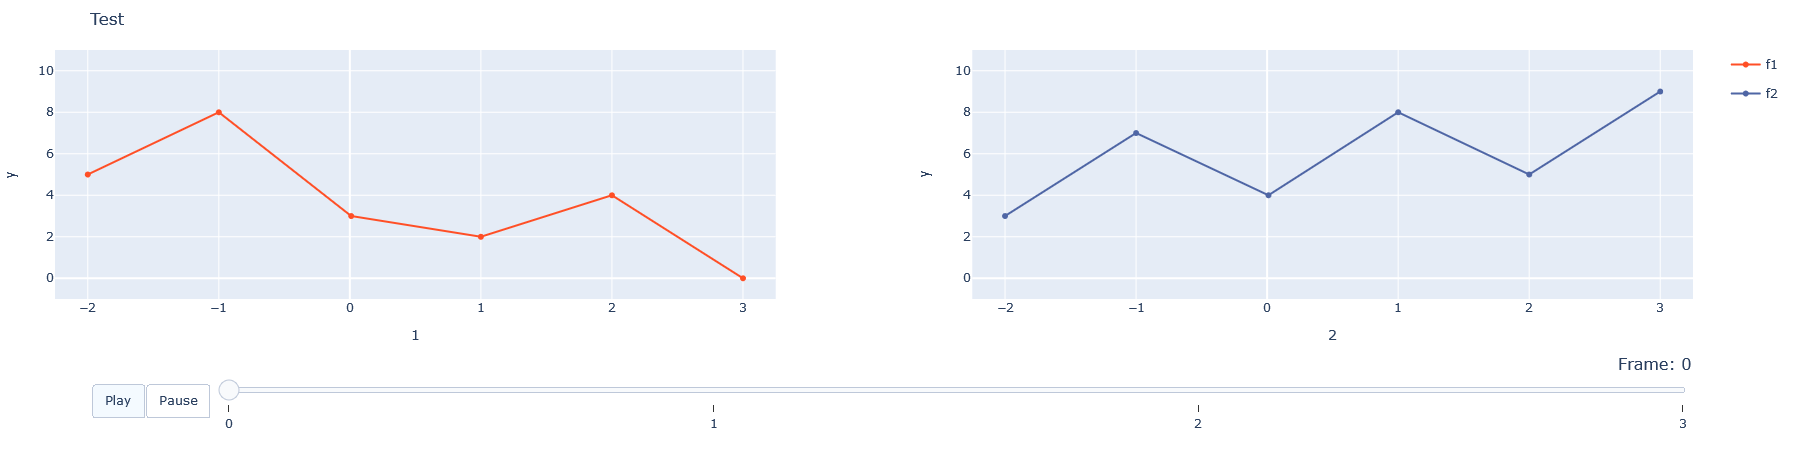

In [83]:
fig = dict(
    layout = dict(
        xaxis1 = {'domain': [0.0, 0.44], 'anchor': 'y1', 'title': '1', 'range': [-2.25, 3.25]},
        yaxis1 = {'domain': [0.0, 1.0], 'anchor': 'x1', 'title': 'y', 'range': [-1, 11]},
        xaxis2 = {'domain': [0.56, 1.0], 'anchor': 'y2', 'title': '2', 'range': [-2.25, 3.25]},
        yaxis2 = {'domain': [0.0, 1.0], 'anchor': 'x2', 'title': 'y', 'range': [-1, 11]},
        title  = 'Test',
        margin = {'t': 50, 'b': 50, 'l': 50, 'r': 50},
        updatemenus = [{'buttons': [{'args': [['0', '1', '2', '3'], {'frame': {'duration': 500.0, 'redraw': False}, 'fromcurrent': True, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': 'Play', 'method': 'animate'}, {'args': [[None], {'frame': {'duration': 0, 'redraw': False}, 'mode': 'immediate', 'transition': {'duration': 0}}], 'label': 'Pause', 'method': 'animate'}], 'direction': 'left', 'pad': {'r': 10, 't': 85}, 'showactive': True, 'type': 'buttons', 'x': 0.1, 'y': 0, 'xanchor': 'right', 'yanchor': 'top'}],
        sliders = [{'yanchor': 'top', 'xanchor': 'left', 'currentvalue': {'font': {'size': 16}, 'prefix': 'Frame: ', 'visible': True, 'xanchor': 'right'}, 'transition': {'duration': 500.0, 'easing': 'linear'}, 'pad': {'b': 10, 't': 50}, 'len': 0.9, 'x': 0.1, 'y': 0, 
                    'steps': [{'args': [['0'], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': False}, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': '0', 'method': 'animate'}, 
                              {'args': [['1'], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': False}, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': '1', 'method': 'animate'}, 
                              {'args': [['2'], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': False}, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': '2', 'method': 'animate'},
                              {'args': [['3'], {'frame': {'duration': 500.0, 'easing': 'linear', 'redraw': False}, 'transition': {'duration': 0, 'easing': 'linear'}}], 'label': '3', 'method': 'animate'}, 
                    ]}]
    ),

    data = [
        {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  4,   1,   1, 1,   4,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'},
        {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  2.5,   1,   1, 1,   2.5,   1], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'},
    ],

    frames = [
        {'name' : '0', 'layout' : {},
         'data': [
             {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  5,   8,   3, 2,   4,   0], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'}, 
             {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  3,   7,   4, 8,   5,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'}],
        },

        {'name' : '1', 'layout' : {},
         'data': [
             {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  4,   1,   1, 1,   4,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'}, 
             {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  2.5,   1,   1, 1,   2.5,   1], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'}],
        },

        {'name' : '2', 'layout' : {},
         'data': [
             {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  5,   8,   3, 2,   4,   0], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'}, 
             {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  3,   7,   4, 8,   5,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'}],
        },

        {'name' : '3', 'layout' : {},
         'data': [
             {'type': 'scatter', 'name': 'f1', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  4,   1,   1, 1,   4,   9], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(255,79,38,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(255,79,38,0.600000)', 'legendgroup': 'f1', 'showlegend': True, 'xaxis': 'x1', 'yaxis': 'y1'}, 
             {'type': 'scatter', 'name': 'f2', 'x': [-2.  , -1.  ,  0.01,  1.  ,  2.  ,  3.  ], 'y': [  2.5,   1,   1, 1,   2.5,   1], 'hoverinfo': 'name+text', 'marker': {'opacity': 1.0, 'symbol': 'circle', 'line': {'width': 0, 'color': 'rgba(50,50,50,0.8)'}}, 'line': {'color': 'rgba(79,102,165,1.000000)'}, 'mode': 'markers+lines', 'fillcolor': 'rgba(79,102,165,0.600000)', 'legendgroup': 'f2', 'showlegend': True, 'xaxis': 'x2', 'yaxis': 'y2'}
         ],
        }
    ]
)

fig = go.Figure(fig)
fig